### Normalising Data

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pandas.read_csv('http://pogo.software/me4ml/tensile_strength.csv')
t = np.array(df['Temperature (deg C)'])
s = np.array(df['Ultimate tensile strength (Pa)'])

In [3]:
s_mean, s_std = np.mean(s), np.std(s)
t_mean, t_std = np.mean(t), np.std(t)
s_norm, t_norm = (s-s_mean)/s_std, (t-t_mean)/t_std

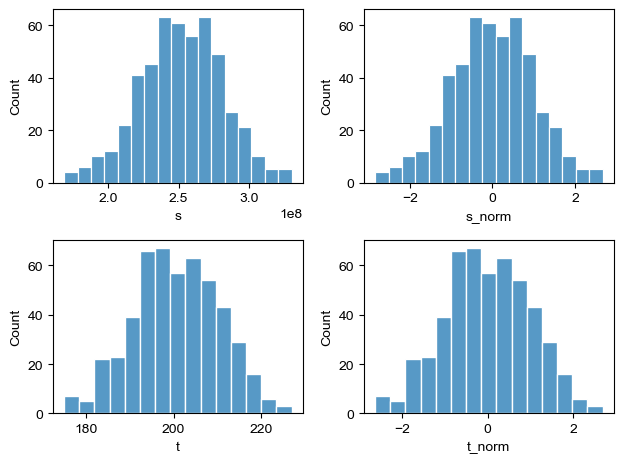

In [4]:
fig, ax = plt.subplots(nrows=2, ncols = 2)
sns.set_theme(palette='Set3')
sns.histplot(data = s, ax = ax[0,0]); ax[0,0].set_xlabel("s")
sns.histplot(data = s_norm, ax = ax[0,1]); ax[0,1].set_xlabel("s_norm")
sns.histplot(data = t, ax = ax[1,0]); ax[1,0].set_xlabel("t")
sns.histplot(data = t_norm, ax = ax[1,1]); ax[1,1].set_xlabel("t_norm")
plt.tight_layout()

### Linear Discriminant Functions

In [13]:
w = np.array([-1,-3]).transpose()
w0 = 1
n = 200
x1, x2 = np.linspace (0,1,n), np.linspace(0,1,n)
x1_grid, x2_grid = np.meshgrid(x1,x2)
size = x1_grid.shape[0]*x1_grid.shape[1]
X = np.concatenate([x1_grid.reshape([size, 1]), x2_grid.reshape([size, 1])], axis = 1)
#g = np.dot(w,X.transpose()) + w0
g = np.transpose(np.matmul(w,X.transpose())) + w0

In [14]:
print (w.shape, X.shape, g.shape)

(2,) (40000, 2) (40000,)


Text(0, 0.5, 'x2')

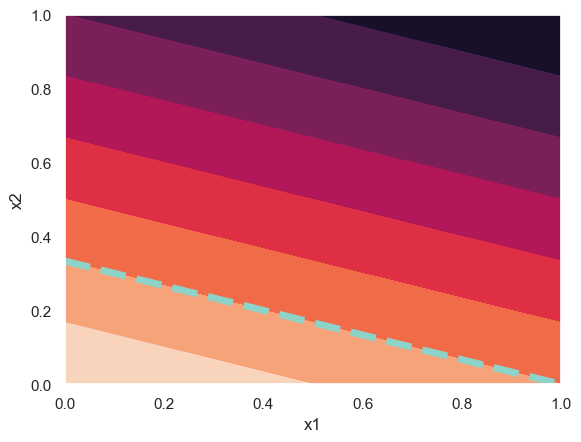

In [75]:
fig, ax = plt.subplots()
ax.contourf(x1,x2,np.reshape(g,[n,n]))

#g(x) = 0 @ x2 = -(1/3)*x1 +1/3
x2_g0 = -(1/3)*x1 +1/3
ax.plot(x1, x2_g0, linewidth = 5, linestyle = "dashed")
ax.set_xlabel("x1"); ax.set_ylabel("x2")

### Plotting Classification Areas

In [61]:
a1 = np.array([1.3,-1,-3])
a2 = np.array([-2,1,2])
a3 = np.array([0.3,0.1,-0.1])
a4 = np.array([0,-1,1])
a5 = np.array([-0.2,1.5,-1])

# y = [1, x1, x2]
# g = ay

Y = np.concatenate((np.ones((size,1)),X), axis = 1)

g1 = np.matmul(Y, a1)
g2 = np.matmul(Y, a2)
g3 = np.matmul(Y, a3)
g4 = np.matmul(Y, a4)
g5 = np.matmul(Y, a5)

gconc = np.array([g1,g2,g3,g4,g5]).transpose()

Text(0, 0.5, 'x2')

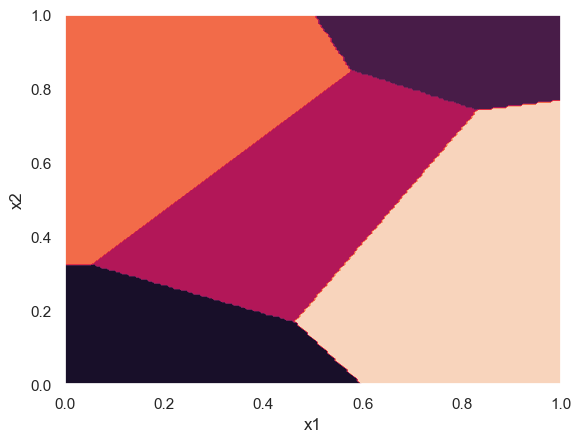

In [76]:
w = np.argmax(gconc, axis = 1)
w = np.reshape(w, [n,n])

fig, ax = plt.subplots()
plt.contourf(x1,x2,w)
ax.set_xlabel("x1"); ax.set_ylabel("x2")

### Higher Order Functions

In [88]:
# y = [1,x1,x2,x1x2]

x1x2 = Y[:,1]* Y[:,2]
x1x2 = x1x2[:, np.newaxis]
Y = np.concatenate((Y,x1x2), axis = 1)

Text(0, 0.5, 'x2')

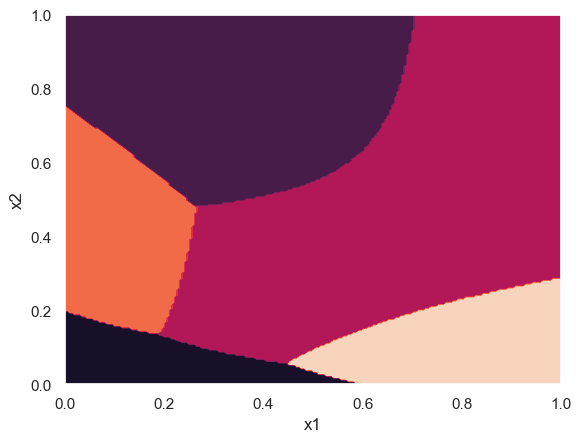

In [91]:
a1 = np.array([1.3,-1,-3,-10])
a2 = np.array([-1,1.5,3,-1])
a3 = np.array([0.4,-0.1,-0.1,3])
a4 = np.array([0.5,-1,1,-0.1])
a5 = np.array([-0.2,1.5,-1,0.4])

g1 = np.matmul(Y, a1)
g2 = np.matmul(Y, a2)
g3 = np.matmul(Y, a3)
g4 = np.matmul(Y, a4)
g5 = np.matmul(Y, a5)

gconc = np.array([g1,g2,g3,g4,g5]).transpose()
w = np.argmax(gconc, axis = 1)
w = np.reshape(w, [n,n])

fig, ax = plt.subplots()
plt.contourf(x1,x2,w)
ax.set_xlabel("x1"); ax.set_ylabel("x2")